In [1]:
!pip install torchvision

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/devrajjajoo/anaconda3/envs/pytorch/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4752820.55it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 138342.77it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1266079.13it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3631438.96it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [5]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [6]:
train_loader

In [7]:
test_loader

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = nn.functional.log_softmax(x, dim=1)
        return output

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

num_epochs = 5
for epoch in range(1, num_epochs + 1):
    train(model, device, train_loader, optimizer, epoch)

/Users/devrajjajoo/anaconda3/envs/pytorch/lib/python3.12/site-packages/torch/nn/functional.py:1347: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.305692
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.282500
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.287350
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.059820
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.146282
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.155905
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.077452
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.125073
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.146986
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.201402
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.281607
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.096390
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.073022
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.263669
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.004530
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.140399
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.060060
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.021370
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.142546
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.101586
Train Epoch:

In [11]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.2f}%)\n')

test(model, device, test_loader)


Test set: Average loss: 0.0000, Accuracy: 9903/10000 (99.03%)



In [12]:
torch.save(model.state_dict(), "mnist_cnn.pt")

In [20]:
def per_class_accuracy(model, test_loader):
    model.eval()
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == target).squeeze()
            for i in range(len(target)):
                label = target[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    for i in range(10):
        print(f'Accuracy of {i}: {100 * class_correct[i] / class_total[i]:.2f}%')

per_class_accuracy(model, test_loader)

/Users/devrajjajoo/anaconda3/envs/pytorch/lib/python3.12/site-packages/torch/nn/functional.py:1347: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Accuracy of 0: 99.59%
Accuracy of 1: 99.65%
Accuracy of 2: 98.84%
Accuracy of 3: 99.21%
Accuracy of 4: 98.98%
Accuracy of 5: 99.22%
Accuracy of 6: 98.75%
Accuracy of 7: 98.54%
Accuracy of 8: 99.38%
Accuracy of 9: 98.12%


In [13]:
from PIL import Image
import torchvision.transforms as transforms

def prepare_image(image_path):
    
    img = Image.open(image_path).convert('L')  
    
    
    transform = transforms.Compose([
        transforms.Resize(28),
        transforms.CenterCrop(28),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    
    
    img_tensor = transform(img)
    
    
    img_tensor = img_tensor.unsqueeze(0)
    
    return img_tensor

In [14]:
model = Net()
model.load_state_dict(torch.load("mnist_cnn.pt"))
model.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [27]:
def predict_digit(model, image_tensor):
    with torch.no_grad():
        output = model(image_tensor)
        prediction = output.argmax(dim=1, keepdim=True)
    return prediction.item()


image_path = "/Users/devrajjajoo/Downloads/IMG_5684.jpeg"
img_tensor = prepare_image(image_path)
predicted_digit = predict_digit(model, img_tensor)
print(f"The predicted digit is: {predicted_digit}")

The predicted digit is: 5


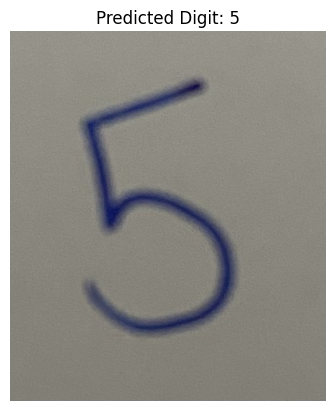

In [28]:
import matplotlib.pyplot as plt

def show_prediction(image_path, predicted_digit):
    img = Image.open(image_path)
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted Digit: {predicted_digit}")
    plt.axis('off')
    plt.show()

show_prediction(image_path, predicted_digit)